In [190]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 25 12:07:40 2022

@author: HP RYZEN 5
"""


import numpy as np 
import matplotlib.pyplot as plt

k=5
l=3
m=2
g=9.8
r_0=15
theta_0=np.pi/8
r_0p=0
theta_0p=0

def f1(r,theta,thetap):
    funcion= k/m*(l-r)+g*np.cos(theta)+r*(thetap**2)
    return funcion

def f2(r,theta,thetap,rp):
    funcion=-(g/r)*np.sin(theta)-(2/r)*rp*thetap
    return funcion

N=2001
t=np.linspace(1,30,N)
def geteuler():
    h= (t[-1] - t[0])/(len(t)-1)
    r0=np.array([r_0,theta_0,theta_0p,r_0p])
    r1= r0+h*f1(r0[0],r0[1],r0[2])
    theta1 = r0+h*f2(r0[0],r0[1],r0[2],r0[3])
    return r1,theta1

r1,theta1=geteuler()

def Beeman():
    h= (t[-1] - t[0])/(len(t)-1)
    theta_0p=0
    r0=np.array([r_0,theta_0,theta_0p,r_0p])
    r10=np.array([r_0,theta_0,theta_0p])
    posr=[]
    posr.append(r10)
    posr.append(r1)
    
    velr=[]
    velr.append(r_0p)
    postheta=[]
    postheta.append(r0)
    postheta.append(theta1)
    veltheta=[]
    veltheta.append(theta_0p)


    for i in range(2,len(t)):
    
        pr=posr[i-1]+h*velr[i-2]+(1/6)*(4*f1(posr[i-1][0],posr[i-1][1],posr[i-1][2])-f1(posr[i-2][0],posr[i-2][1],posr[i-2][2]))*(h**2)
        thetar=postheta[i-1]+h*veltheta[i-2]+(1/6)*(4*f2(postheta[i-1][0],postheta[i-1][1],postheta[i-1][2],postheta[i-1][3])-f2(postheta[i-2][0],postheta[i-2][1],postheta[i-2][2],postheta[i-2][3]))*(h**2)
        vr=velr[i-2]+(1/2)*(3*f1(posr[i-1][0],posr[i-1][1],posr[i-1][2])-f1(posr[i-2][0],posr[i-2][1],posr[i-2][2]))*h
        vtheta=veltheta[i-2]+(1/2)*(3*f2(postheta[i-1][0],postheta[i-1][1],postheta[i-1][2],postheta[i-1][3])-f2(postheta[i-2][0],postheta[i-2][1],postheta[i-2][2],postheta[i-2][3]))*h
        posr.append(pr)
        postheta.append(thetar)
        velr.append(vr)
        veltheta.append(vtheta)
        
    return posr, postheta, velr, veltheta


r,theta,v,dtheta=Beeman()     

In [191]:
print(r)

[array([15.        ,  0.39269908,  0.        ]), array([14.69628328,  0.08898236, -0.30371672, -0.30371672]), array([14.69447691,  0.08717599, -0.30552309, -0.30552309]), array([14.68906087,  0.08175995, -0.31093913, -0.31093913]), array([14.67984982,  0.0725489 , -0.32015018, -0.32015018]), array([14.66686757,  0.05956665, -0.33313243, -0.33313243]), array([14.65014847,  0.04284755, -0.34985153, -0.34985153]), array([14.6297377 ,  0.02243678, -0.3702623 , -0.3702623 ]), array([ 1.46056919e+01, -1.60906323e-03, -3.94308145e-01, -3.94308145e-01]), array([14.57807962, -0.0292213 , -0.42192038, -0.42192038]), array([14.54698256, -0.06031836, -0.45301744, -0.45301744]), array([14.51249593, -0.09480499, -0.48750407, -0.48750407]), array([14.47472954, -0.13257138, -0.52527046, -0.52527046]), array([14.43380865, -0.17349227, -0.56619135, -0.56619135]), array([14.3898748 , -0.21742612, -0.6101252 , -0.6101252 ]), array([14.34308663, -0.26421429, -0.65691337, -0.65691337]), array([14.29362061, 

TypeError: can only concatenate list (not "float") to list

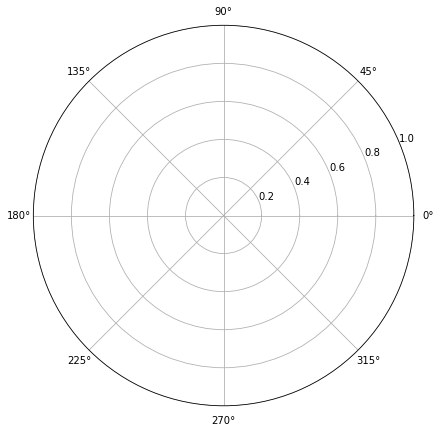

In [192]:
r_r=[]
theta_r=[]
t_r=[]
for i in range(len(t)):
    if i%20==0:
        t_r.append(t[i])
        r_r.append(r[i][0])
        theta_r.append(theta[i][0])      

t_r=np.array(t_r)
r_r=np.array(r_r)
theta_r=np.array(theta_r)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1,projection="polar")
ax1.plot(theta+(3/2)*np.pi,r)

[-13.85819299   9.21586751  -7.09189261  -7.57925593  -7.5151591
  -7.41553962  -7.32001545  -7.23818323  -7.17109124  -7.11722871
  -7.0744747   -7.04076233  -7.01428835  -6.99355379  -6.97734332
  -6.96468543  -6.95481018  -6.94711068  -6.94111032  -6.93643574
  -6.93279493  -6.92995982  -6.92775243  -6.92603398  -6.92469628
  -6.92365503  -6.92284459  -6.92221381  -6.92172288  -6.92134081
  -6.92104345  -6.92081204  -6.92063195  -6.92049179  -6.92038272
  -6.92029784  -6.92023178  -6.92018037  -6.92014037  -6.92010924
  -6.92008501  -6.92006615  -6.92005148  -6.92004006  -6.92003118
  -6.92002426  -6.92001888  -6.92001469  -6.92001143  -6.9200089
  -6.92000692  -6.92000539  -6.92000419  -6.92000326  -6.92000254
  -6.92000198  -6.92000154  -6.9200012   -6.92000093  -6.92000072
  -6.92000056  -6.92000044  -6.92000034  -6.92000027  -6.92000021
  -6.92000016  -6.92000013  -6.9200001   -6.92000008  -6.92000006
  -6.92000005  -6.92000004  -6.92000003  -6.92000002  -6.92000002
  -6.9200000

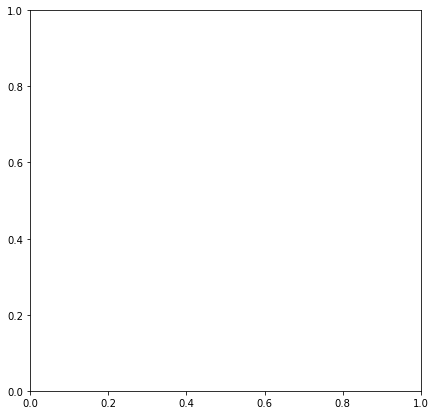

In [167]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
x=r_r*np.cos(theta_r+(3/2)*np.pi)
y=r_r*np.sin(theta_r+(3/2)*np.pi)
print(y)
def init():
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)



def Update(i):
    
    plot = ax.clear()
    init()


  
    ax.scatter(x[i],y[i])
        
     
   
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t_r),init_func=init)

In [166]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=30, metadata=dict(artist='FaberJoan'))
Animation.save('pendulo.mp4', writer=writer_)